# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler #for feature scaling

#for model building
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Importing the training set

In [2]:

dataset_train = pd.read_csv('dataset/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling
You can use standardisation or normalisation for RNN we will use normalisation

In [3]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Create data structure 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):# use previous examples to predict the next value
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping
We have two dimensions but we need to use reshape to get three dimensions. This third dimension will include the indicators.

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #batch size (numer of observations), #number of columns (timesteps), just have 1 indicator but can increase with more

## Part 2 - RNN-LSTM Model building with Keras

In [6]:
regressor = Sequential()

### Add layers 1 to 4 with dropout to stop ovewrfitting

In [7]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Add output layer

In [11]:
regressor.add(Dense(units = 1))

### Compile RNN model

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fit RNN to the Training set

In [13]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 69ms/step - loss: 0.0446
Epoch 2/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

## Part 3 - Predict & Visualise

### Real 2017 stock price

In [16]:
dataset_test = pd.read_csv('dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Get predicted 2017 stock price

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

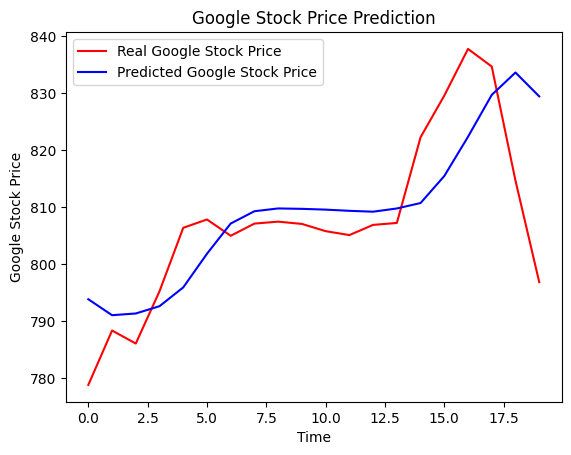

In [19]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()